In [554]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.ticker as ticker

In [555]:
df = pd.read_csv("donnees_nettoyées.csv")

In [556]:
df.head()

,Zone,Population,Stabilite_politique,PIB_Habitant,Dispo alimentaire (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,%Dependance importation
0,Afghanistan,36296.113,-2.79,2956.8,357.31,15139.0,601.0,4555.0,11609.0,29.27
1,Afrique du Sud,57009.756,-0.28,14823.6,556.42,66840.0,10968.0,9020.0,68455.0,13.56
2,Albanie,2884.169,0.37,14229.3,1260.49,4879.0,156.0,884.0,4231.0,17.83
3,Algérie,41389.189,-0.92,13805.4,798.71,45365.0,743.0,19718.0,26763.0,43.11
4,Allemagne,82658.409,0.57,61563.6,943.24,174960.0,58793.0,66550.0,167828.0,37.90


In [557]:
numeric_data = df[['Population', 'Stabilite_politique',	'PIB_Habitant',	'Dispo alimentaire (kg/personne/an)',	'Disponibilité intérieure',	'Exportations - Quantité',	'Importations - Quantité', 'Production', '%Dependance importation']]
numeric_data.head()

,Population,Stabilite_politique,PIB_Habitant,Dispo alimentaire (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,%Dependance importation
0,36296.113,-2.79,2956.8,357.31,15139.0,601.0,4555.0,11609.0,29.27
1,57009.756,-0.28,14823.6,556.42,66840.0,10968.0,9020.0,68455.0,13.56
2,2884.169,0.37,14229.3,1260.49,4879.0,156.0,884.0,4231.0,17.83
3,41389.189,-0.92,13805.4,798.71,45365.0,743.0,19718.0,26763.0,43.11
4,82658.409,0.57,61563.6,943.24,174960.0,58793.0,66550.0,167828.0,37.90


In [558]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_data)
normalized_data = pd.DataFrame(X_scaled, columns=numeric_data.columns)
normalized_data.head()

,Population,Stabilite_politique,PIB_Habitant,Dispo alimentaire (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,%Dependance importation
0,-0.046924,-3.147705,-0.870291,-1.548568,-0.221798,-0.368271,-0.205539,-0.243942,-0.110379
1,0.086867,-0.269633,-0.382298,-0.616089,0.005452,0.060813,0.016349,0.006136,-0.654173
2,-0.262734,0.475685,-0.406738,2.681236,-0.266896,-0.386689,-0.387969,-0.276400,-0.506369
3,-0.014028,-1.003484,-0.424169,0.518612,-0.088941,-0.362394,0.547986,-0.177277,0.368686
4,0.252533,0.705013,1.539769,1.195480,0.480689,2.040262,2.875300,0.443299,0.188344


In [559]:
pays = df['Zone'].to_numpy()

indicateurs = df[['Population', 'Stabilite_politique','PIB_Habitant', 'Dispo alimentaire (kg/personne/an)', 'Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Production', '%Dependance importation']].columns.to_numpy()

# Classification ascendante hiérarchique

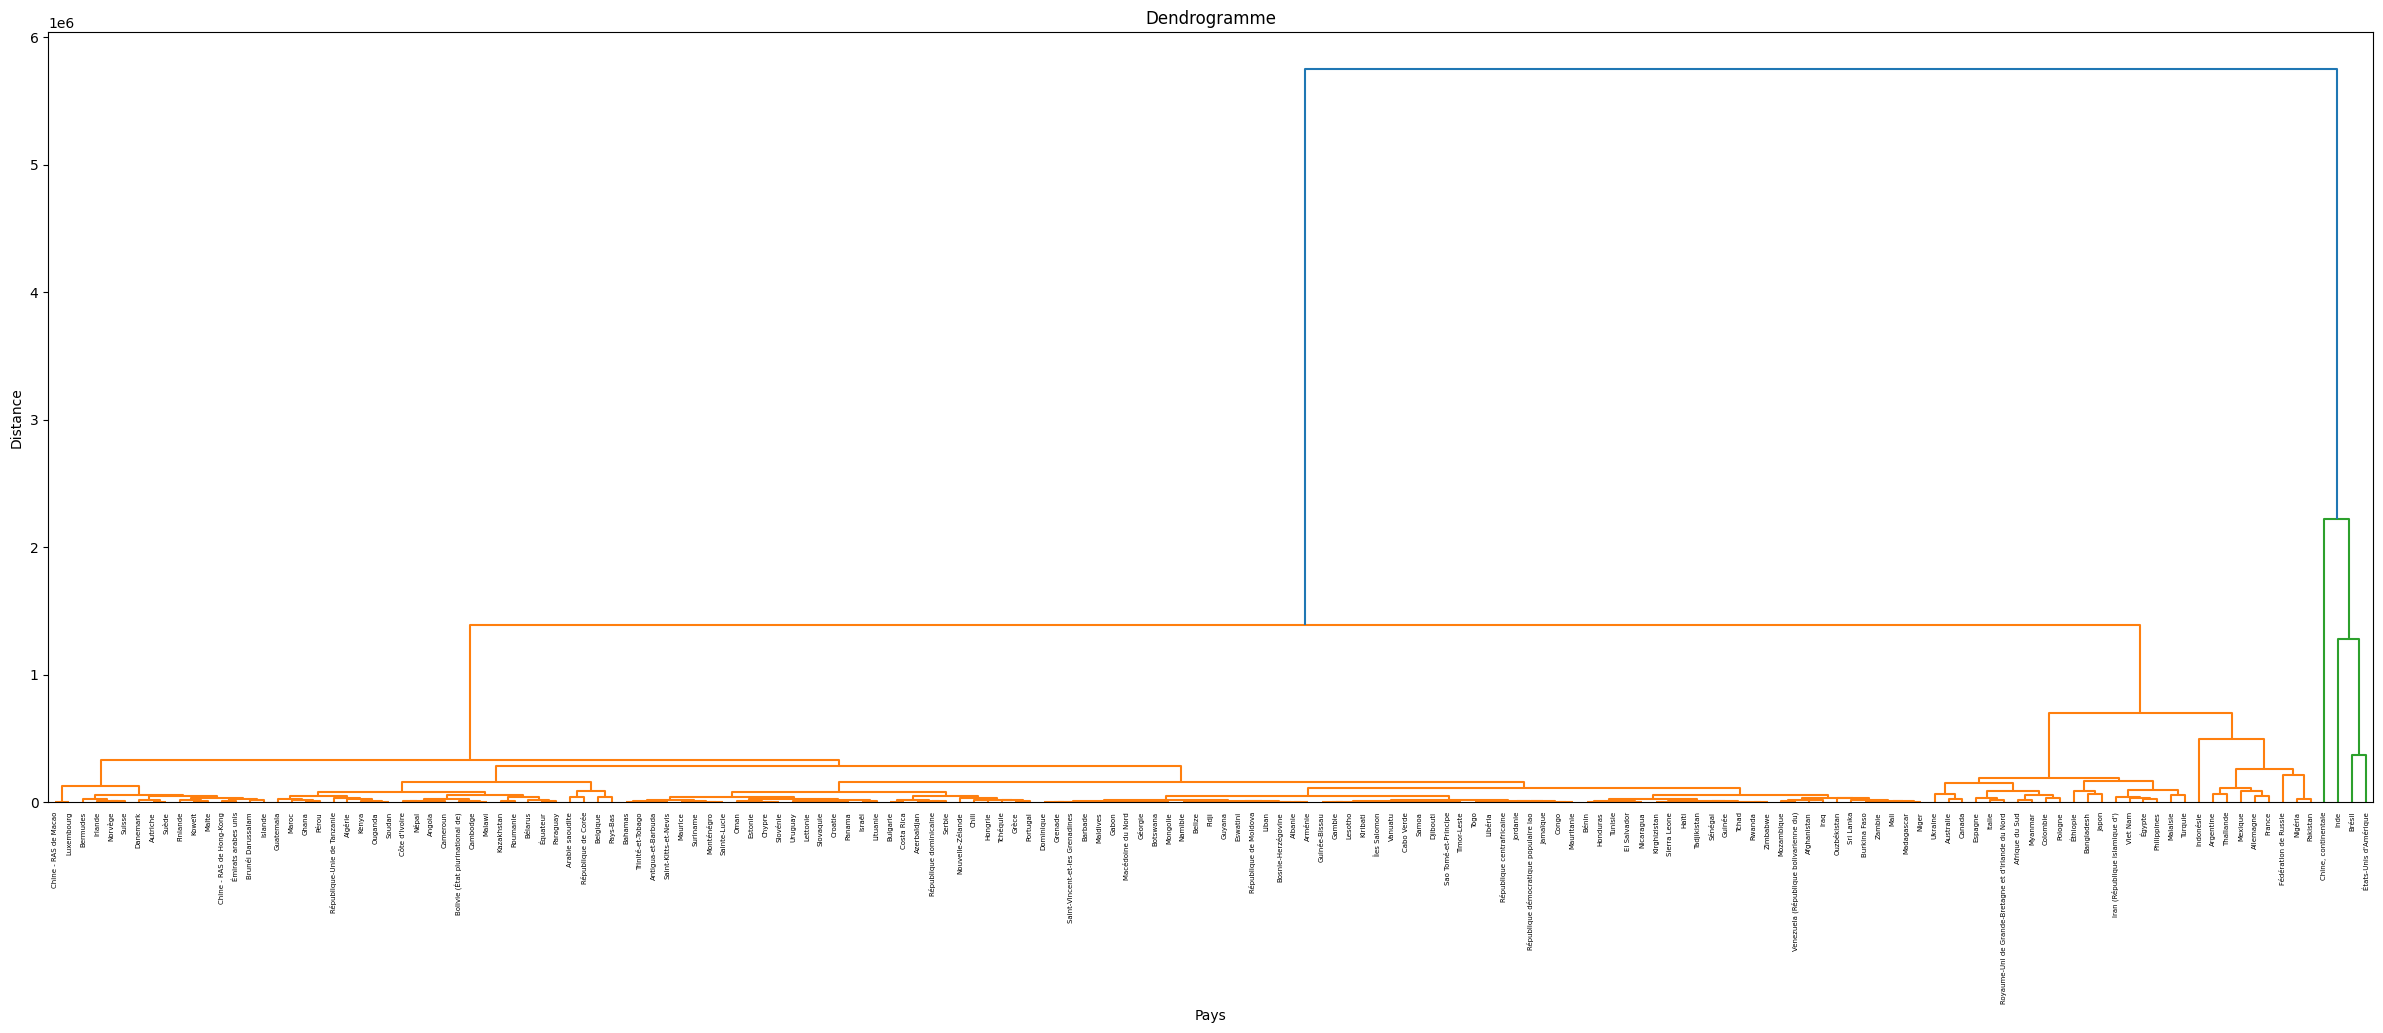

In [560]:
Z = linkage(numeric_data, method='ward', metric='euclidean')
plt.figure(figsize=(30,10))
dendrogram(Z, labels=df['Zone'].values)
plt.title('Dendrogramme')
plt.xlabel('Pays')
plt.ylabel("Distance")
plt.show()

In [561]:
zone_attipique = ['Inde', "Brésil", "Chine, continentale", "États-Unis d'Amérique", "Indonésie"]
df_filtre = df[~df['Zone'].isin(zone_attipique)]

In [562]:
df_filtre.to_csv("df_R.csv", index=False)

In [563]:
numeric_data2 = df_filtre[['Population', 'Stabilite_politique', 'PIB_Habitant', 'Dispo alimentaire (kg/personne/an)',	'Disponibilité intérieure',	'Exportations - Quantité',	'Importations - Quantité', 'Production', '%Dependance importation']]

In [564]:
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(numeric_data2)
normalized_data2 = pd.DataFrame(X_scaled2, columns=numeric_data2.columns)
normalized_data2.head()

,Population,Stabilite_politique,PIB_Habitant,Dispo alimentaire (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,%Dependance importation
0,0.375954,-3.120971,-0.867736,-1.536248,-0.326915,-0.432264,-0.185903,-0.377778,-0.138578
1,0.959317,-0.274101,-0.381407,-0.604448,0.710843,0.284642,0.203365,0.674825,-0.681433
2,-0.565034,0.463136,-0.405762,2.690477,-0.532856,-0.463037,-0.505947,-0.514394,-0.533884
3,0.519392,-0.999996,-0.423135,0.529427,0.279790,-0.422444,1.136037,-0.097175,0.339661
4,1.681666,0.689978,1.534109,1.205802,2.881059,3.591869,5.218941,2.514890,0.159630


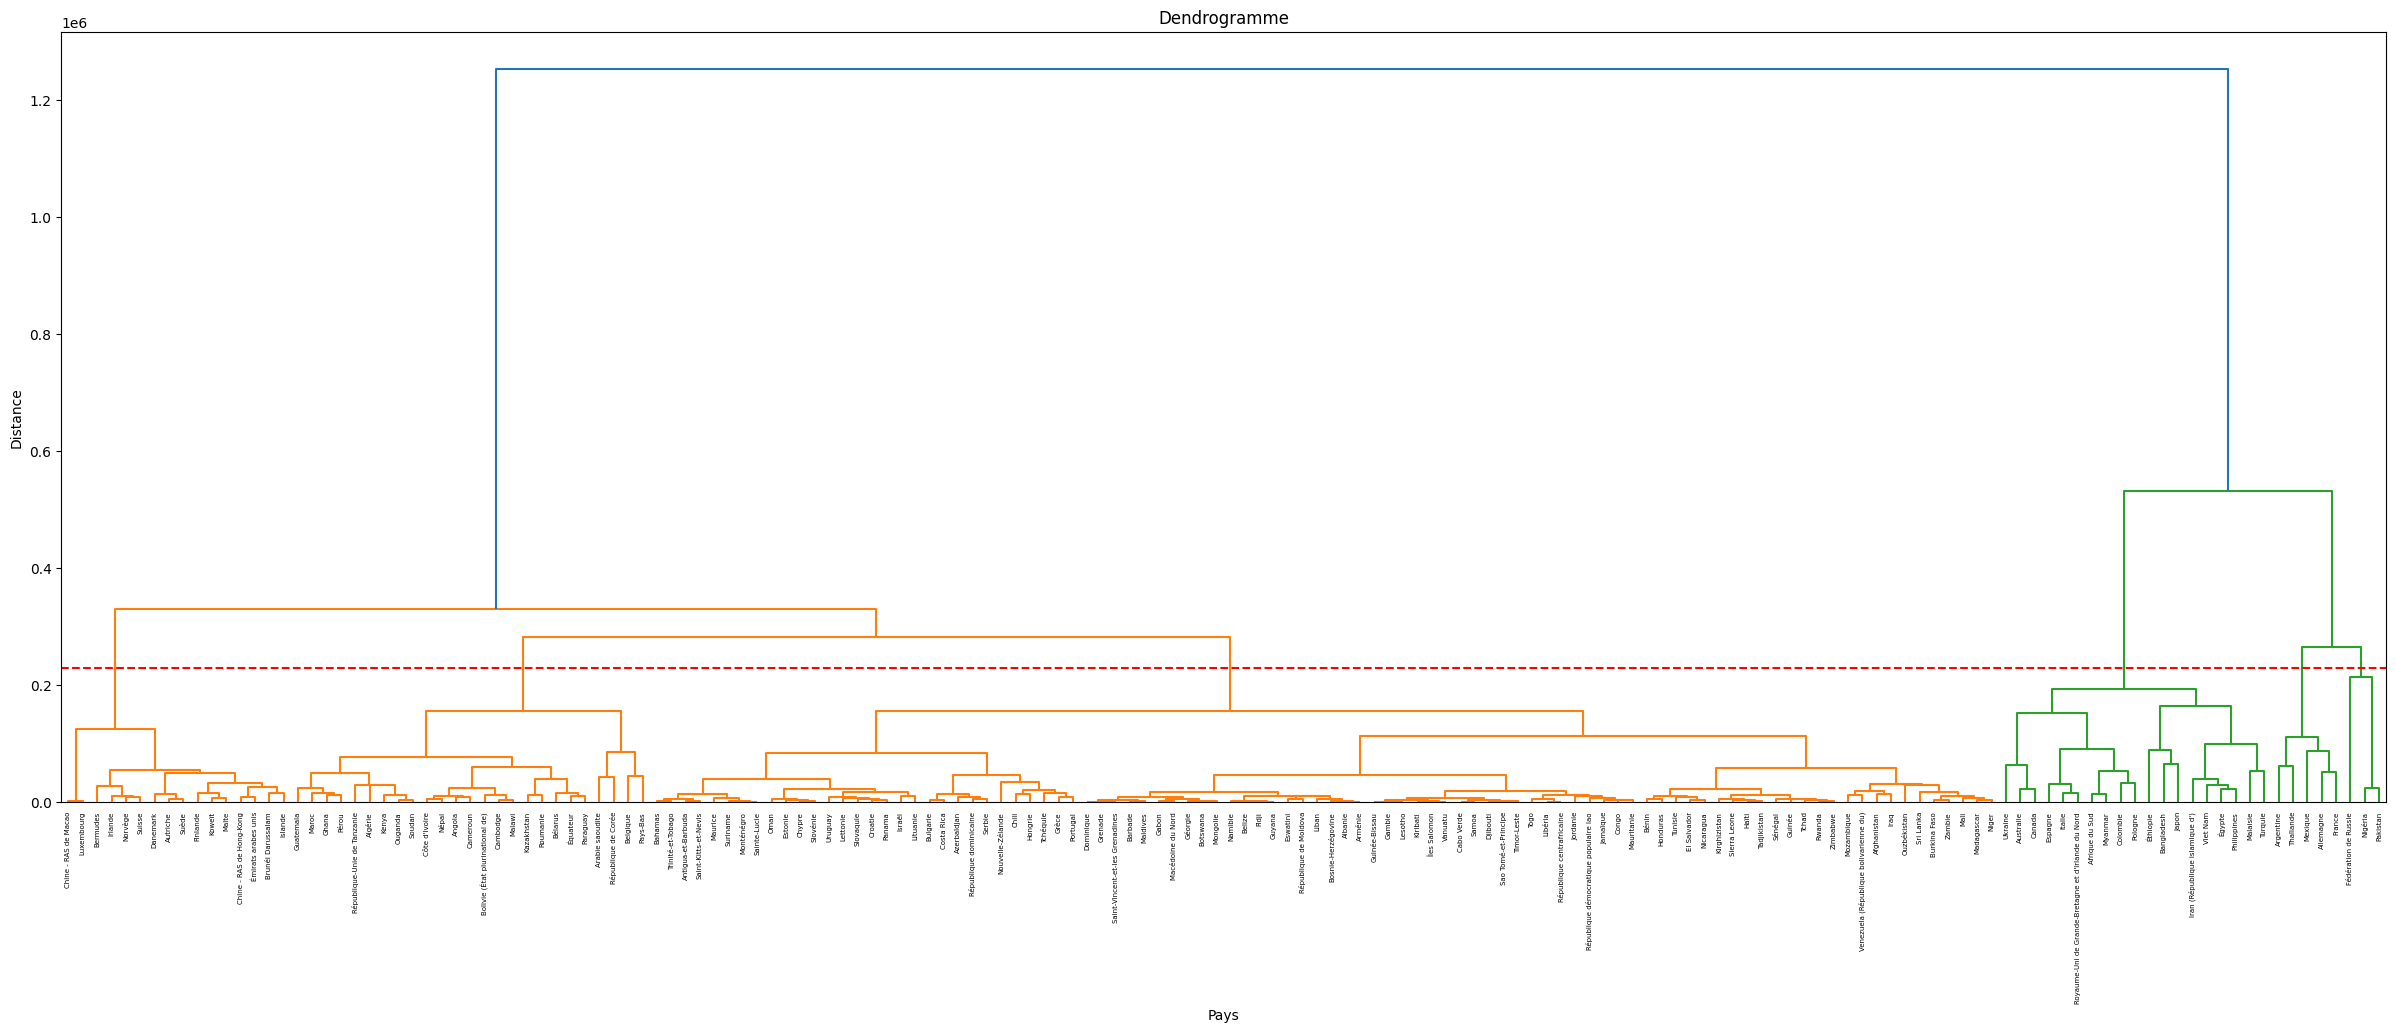

In [565]:
Z = linkage(numeric_data2, method='ward', metric='euclidean')
plt.figure(figsize=(30,10))
dendrogram(Z, labels=df_filtre['Zone'].values)
plt.axhline(y=230000, color='r', linestyle='--')
plt.title('Dendrogramme')
plt.xlabel('Pays')
plt.ylabel("Distance")
plt.show()

In [566]:
# Initialise le nombre de clusters
n_clusters = 6

# Effectue le clustering
clustering = fcluster(Z, t=n_clusters, criterion='maxclust')

In [567]:
df_filtre['cluster_cah'] = clustering

C:\Users\ZCWZ3296\AppData\Local\Temp\1\ipykernel_324\600013568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre['cluster_cah'] = clustering


In [568]:
clusters = np.sort(df_filtre['cluster_cah'].unique())

# Liste les pays de chaque cluster et les affiche
for cluster in clusters:
    n_pays = len(
        df_filtre.loc[df_filtre['cluster_cah'] == cluster, 'Zone'])
    liste_pays = list(
        df_filtre.loc[df_filtre['cluster_cah'] == cluster, 'Zone'])

    print(f'Cluster {cluster} - {n_pays} Zone')
    print(f'{liste_pays}')

Cluster 1 - 16 Zone
['Autriche', 'Bermudes', 'Brunéi Darussalam', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Danemark', 'Émirats arabes unis', 'Finlande', 'Irlande', 'Islande', 'Koweït', 'Luxembourg', 'Malte', 'Norvège', 'Suède', 'Suisse']
Cluster 2 - 25 Zone
['Algérie', 'Angola', 'Arabie saoudite', 'Bélarus', 'Belgique', 'Bolivie (État plurinational de)', 'Cambodge', 'Cameroun', "Côte d'Ivoire", 'Équateur', 'Ghana', 'Guatemala', 'Kazakhstan', 'Kenya', 'Malawi', 'Maroc', 'Népal', 'Ouganda', 'Paraguay', 'Pays-Bas', 'Pérou', 'République de Corée', 'République-Unie de Tanzanie', 'Roumanie', 'Soudan']
Cluster 3 - 94 Zone
['Afghanistan', 'Albanie', 'Antigua-et-Barbuda', 'Arménie', 'Azerbaïdjan', 'Bahamas', 'Barbade', 'Belize', 'Bénin', 'Bosnie-Herzégovine', 'Botswana', 'Bulgarie', 'Burkina Faso', 'Cabo Verde', 'Chili', 'Chypre', 'Congo', 'Costa Rica', 'Croatie', 'Djibouti', 'Dominique', 'El Salvador', 'Estonie', 'Eswatini', 'Fidji', 'Gabon', 'Gambie', 'Géorgie', 'Grèce', 'Grenade'

In [569]:
normalized_data2['cluster_cah'] = clustering

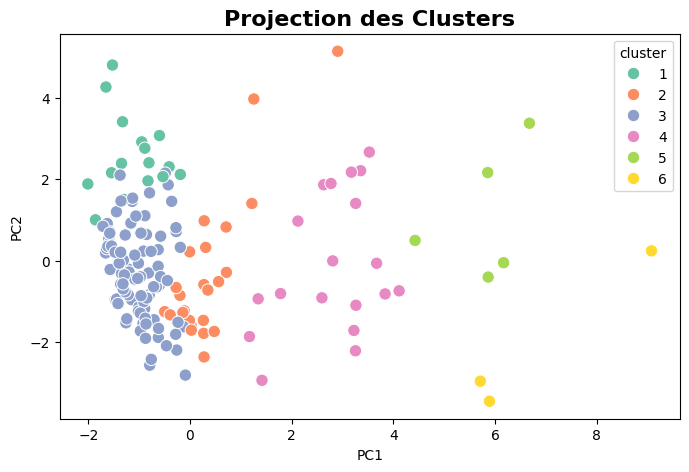

In [570]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_data2.drop(columns=["cluster_cah"]))
# Créer un DataFrame avec les 2 premières composantes principales et la colonne des clusters
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
pca_df["cluster"] = normalized_data2["cluster_cah"]
# Afficher le graphique
plt.figure(figsize=(8, 5))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="cluster", palette="Set2", s=80)
plt.title("Projection des Clusters", fontsize=16, fontweight='bold')
plt.show()

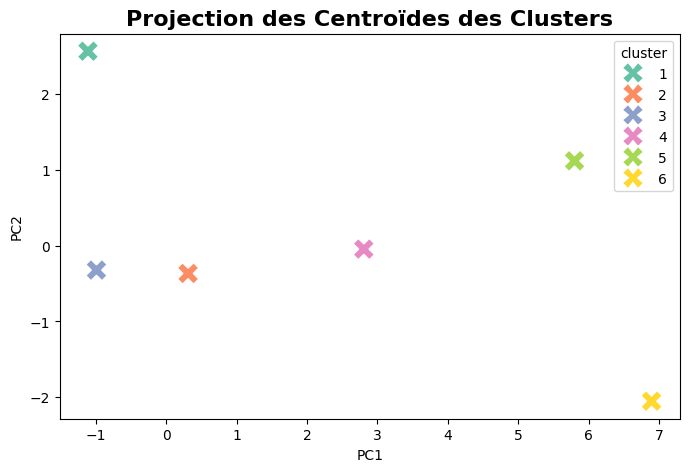

In [571]:
# Calculer les centroïdes (moyennes des points dans chaque cluster)
centroids = pca_df.groupby("cluster")[["PC1", "PC2"]].mean()
# Tracer un scatter plot des centroïdes uniquement
plt.figure(figsize=(8, 5))
sns.scatterplot(data=centroids, x="PC1", y="PC2", hue=centroids.index, palette="Set2", s=250, marker="X")
plt.title("Projection des Centroïdes des Clusters", fontsize=16, fontweight='bold')
plt.show()

In [572]:
cah_clusters_statistics = (
    df_filtre.groupby('cluster_cah')[indicateurs].mean()
)

(cah_clusters_statistics
 .T.style.background_gradient(axis='columns').format('{:.2f}')
)

cluster_cah,1,2,3,4,5,6
Population,4487.36,27044.54,7233.60,71568.82,77085.04,181436.51
Stabilite_politique,1.01,-0.36,-0.00,-0.39,-0.11,-1.68
PIB_Habitant,77660.24,17917.99,15728.74,26697.00,37156.52,15684.27
Dispo alimentaire (kg/personne/an),777.89,696.99,651.54,736.77,792.51,662.23
Disponibilité intérieure,7775.56,35136.36,6805.77,98861.68,173347.20,234440.67
Exportations - Quantité,3375.69,7358.40,1575.70,20188.53,54978.40,21813.67
Importations - Quantité,4722.12,10018.44,1854.04,19937.11,32359.00,14152.00
Production,6577.25,33246.12,6558.82,100599.47,197816.60,244127.33
%Dependance importation,73.48,24.80,33.19,19.48,17.80,5.67


In [573]:
def clusters_boxplot(clusters, clusters_retenus):
    '''
    Trace la dispersion des indicateurs pour chaque clusters.
    Paramètres :
    - clusters : la série contenant les clusters.
    - clusters_retenus : l'array contenant la liste des clusters à analyser.
    '''
    # Crée un DataFrame tempraire avec les clusters retenus
    df_temp = (
        df_filtre.loc[clusters.isin(clusters_retenus)]
    ).copy()

    # Trace le graphique pour chaque indicateur
    fig, axs = plt.subplots(3, 3, figsize=(9.6, 7.68))

    for i, indicateur in enumerate(indicateurs):
        r = i // 3
        c = i % 3
        sns.boxplot(data=df_temp, x=indicateur,
                    y=clusters.name, orient='h',
                    ax=axs[r, c])

    # Supprime les graphiques vides
    [fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]

    fig.suptitle('Dispersion des indicateurs')

    fig.tight_layout()

    plt.show()

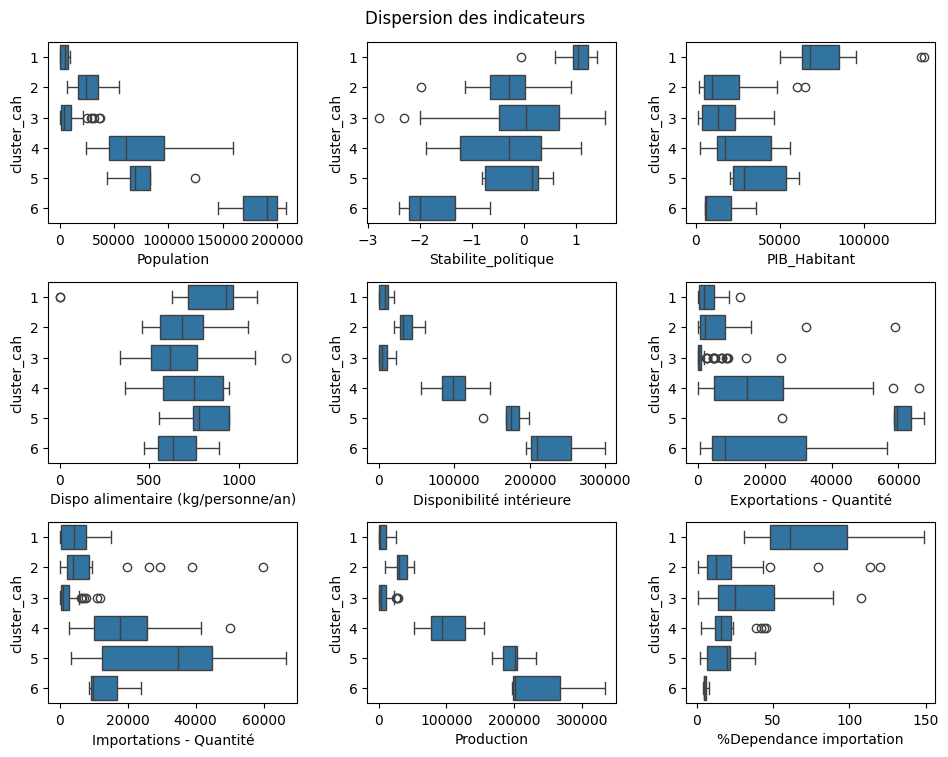

In [574]:
clusters_boxplot(df_filtre['cluster_cah'], [1, 2, 3, 4, 5, 6])

In [575]:
clusters_retenus_cah = [1, 4, 5]

pays_retenus_cah = set(df_filtre.loc[df_filtre['cluster_cah'].isin([1, 4, 5]), 'Zone'])

# Kmeans

In [576]:
X = normalized_data
intertia_list = [ ]
k_list = range(1, 10)
for k in k_list :
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled2)
    intertia_list.append(kmeans.inertia_)

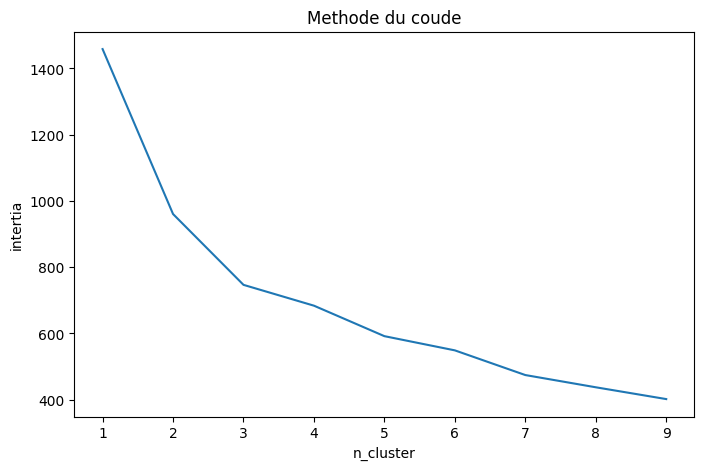

In [577]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
plt.title("Methode du coude")

ax = plt.plot(k_list, intertia_list)

In [578]:
n_clusters = 4

clustering = KMeans(n_clusters=n_clusters, n_init='auto', init='random',
                    random_state=0)
clustering.fit(X_scaled2)

KMeans(init='random', n_clusters=4, random_state=0)

In [579]:
df_filtre['cluster_kmeans'] = clustering.labels_ + 1

C:\Users\ZCWZ3296\AppData\Local\Temp\1\ipykernel_324\1567637808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre['cluster_kmeans'] = clustering.labels_ + 1


In [580]:
clusters = np.sort(df_filtre['cluster_kmeans'].unique())

for cluster in clusters:
    n_pays = len(
        df_filtre.loc[df_filtre['cluster_kmeans'] == cluster, 'Zone'])
    liste_pays = list(
        df_filtre.loc[df_filtre['cluster_kmeans'] == cluster, 'Zone'])

    print(f'Cluster {cluster} - {n_pays} Zone')
    print(f'{liste_pays}')

del clusters, cluster, n_pays, liste_pays

Cluster 1 - 83 Zone
['Afghanistan', 'Afrique du Sud', 'Algérie', 'Angola', 'Arménie', 'Azerbaïdjan', 'Bélarus', 'Belize', 'Bénin', 'Bolivie (État plurinational de)', 'Burkina Faso', 'Cambodge', 'Cameroun', 'Colombie', 'Congo', "Côte d'Ivoire", 'Djibouti', 'El Salvador', 'Équateur', 'Eswatini', 'Éthiopie', 'Fidji', 'Gabon', 'Gambie', 'Géorgie', 'Ghana', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Guyana', 'Haïti', 'Honduras', 'Îles Salomon', 'Iraq', 'Jamaïque', 'Jordanie', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Kiribati', 'Lesotho', 'Liban', 'Libéria', 'Macédoine du Nord', 'Madagascar', 'Malawi', 'Mali', 'Maroc', 'Maurice', 'Mauritanie', 'Mongolie', 'Mozambique', 'Myanmar', 'Namibie', 'Népal', 'Nicaragua', 'Niger', 'Ouganda', 'Ouzbékistan', 'Paraguay', 'Pérou', 'République centrafricaine', 'République de Moldova', 'République démocratique populaire lao', 'République dominicaine', 'République-Unie de Tanzanie', 'Rwanda', 'Sao Tomé-et-Principe', 'Sénégal', 'Serbie', 'Sierra Leone', 'Soudan'

In [581]:
normalized_data2['cluster_kmeans'] = clustering.labels_ + 1

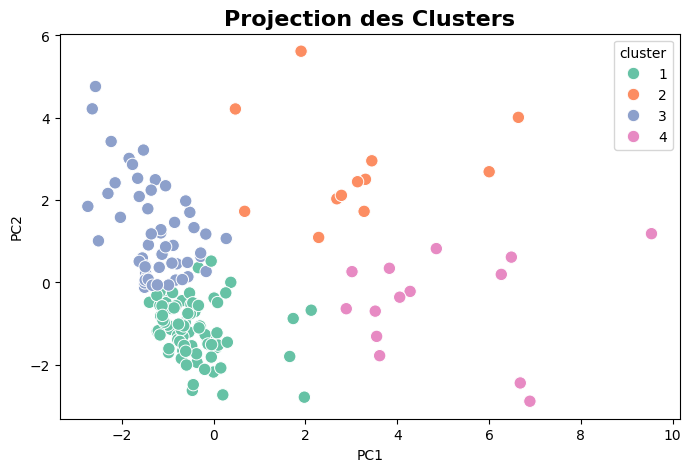

In [582]:
# Appliquer PCA pour réduire les dimensions à 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_data2.drop(columns=['cluster_kmeans']))
# Créer un DataFrame avec les 2 premières composantes principales et la colonne des clusters
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
pca_df["cluster"] = normalized_data2["cluster_kmeans"]
# Afficher le graphique
plt.figure(figsize=(8, 5))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="cluster", palette="Set2", s=80)
plt.title("Projection des Clusters", fontsize=16, fontweight='bold')
plt.show()

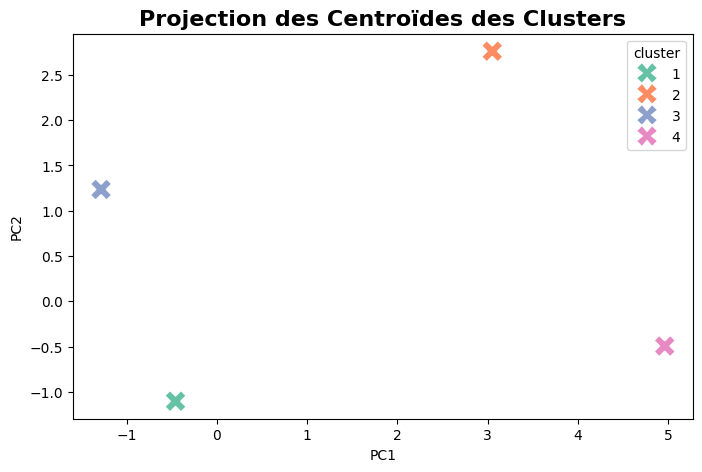

In [583]:
centroids = pca_df.groupby("cluster")[["PC1", "PC2"]].mean()
plt.figure(figsize=(8, 5))
sns.scatterplot(data=centroids, x="PC1", y="PC2", hue=centroids.index, palette="Set2", s=250, marker="X")
plt.title("Projection des Centroïdes des Clusters", fontsize=16, fontweight='bold')
plt.show()

In [584]:
kmeans_clusters_statistics = pd.DataFrame(
    scaler.inverse_transform(clustering.cluster_centers_)).T

kmeans_clusters_statistics = kmeans_clusters_statistics.set_index(indicateurs)

kmeans_clusters_statistics.columns = kmeans_clusters_statistics.columns + 1

(kmeans_clusters_statistics
 .style.background_gradient(axis='columns').format('{:.2f}'))

,1,2,3,4
Population,16392.79,52321.64,4781.75,105394.15
Stabilite_politique,-0.44,0.59,0.72,-1.04
PIB_Habitant,8725.63,51913.12,43676.95,17644.98
Dispo alimentaire (kg/personne/an),596.00,896.19,776.94,690.25
Disponibilité intérieure,16742.27,94229.17,7469.83,155337.93
Exportations - Quantité,1477.54,36068.92,3571.36,26089.79
Importations - Quantité,2501.64,36730.17,3618.06,17371.14
Production,15810.02,95224.08,7653.36,166087.43
%Dependance importation,20.05,46.52,56.71,11.66


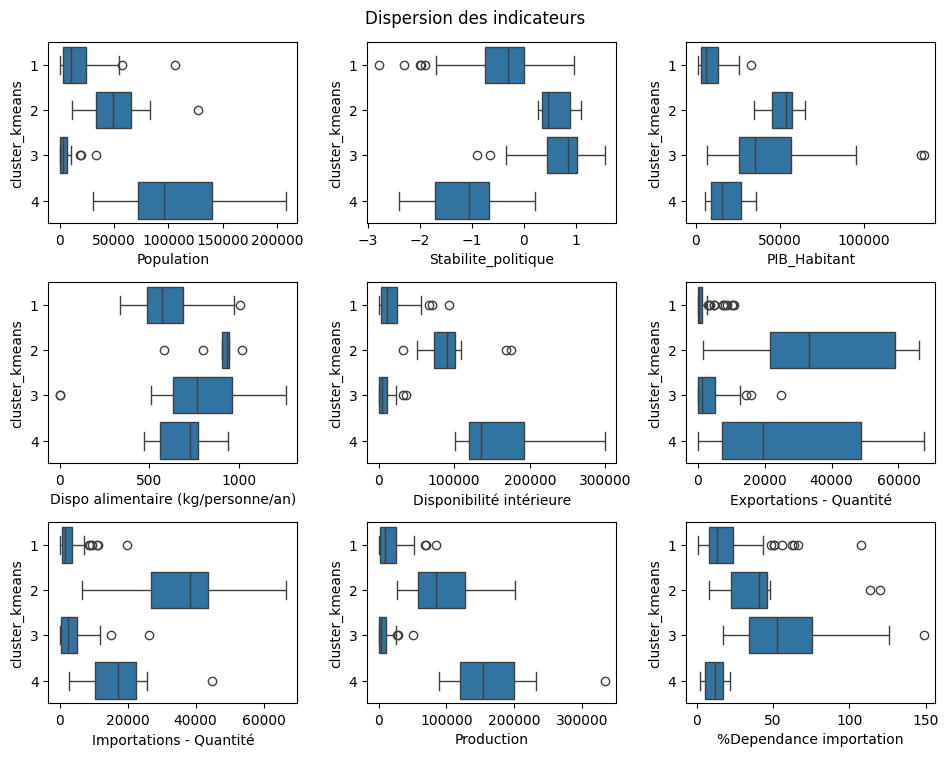

In [585]:
clusters_boxplot(df_filtre['cluster_kmeans'], [1, 2, 3, 4])

In [586]:
clusters_retenus_kmeans = [2, 3]

pays_retenus_kmeans = set(
    df_filtre.loc[df_filtre['cluster_kmeans'].isin([2, 3]), 'Zone'])

print(pays_retenus_kmeans)

{'Cabo Verde', 'Chili', 'Dominique', 'Chine - RAS de Hong-Kong', 'Grèce', 'Espagne', 'Danemark', 'Émirats arabes unis', 'Arabie saoudite', 'Brunéi Darussalam', 'Hongrie', 'Islande', 'Bahamas', 'Tchéquie', 'Antigua-et-Barbuda', 'France', 'Slovaquie', 'Israël', 'Bosnie-Herzégovine', 'Estonie', 'Pays-Bas', 'Saint-Vincent-et-les Grenadines', 'Bermudes', 'Suède', 'Japon', 'Luxembourg', 'Slovénie', 'Croatie', 'Italie', 'Finlande', 'Saint-Kitts-et-Nevis', 'Belgique', 'Panama', 'Monténégro', 'Maldives', 'Allemagne', 'Lituanie', 'Chine - RAS de Macao', 'Oman', 'Portugal', 'Trinité-et-Tobago', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Koweït', 'Barbade', 'Malte', 'Pologne', 'Suisse', 'Australie', 'Grenade', 'Canada', 'Chypre', 'Bulgarie', 'Irlande', 'République de Corée', 'Sainte-Lucie', 'Autriche', 'Lettonie', 'Samoa', 'Norvège', 'Costa Rica', 'Uruguay', 'Albanie', 'Nouvelle-Zélande', 'Botswana', 'Roumanie'}


# Recommendation

In [587]:
# Affiche le nombre de pays contenus dans chaque liste
print(f'Nombre de pays :')
print(f'- CAH : {len(pays_retenus_cah)}')
print(f'- k-means : {len(pays_retenus_kmeans)}')

Nombre de pays :
- CAH : 40
- k-means : 65


In [588]:
print(pays_retenus_cah)

{'Colombie', 'Égypte', 'Chine - RAS de Hong-Kong', 'Espagne', 'Danemark', 'Émirats arabes unis', 'Islande', 'Brunéi Darussalam', 'France', 'Ukraine', 'Bermudes', "Iran (République islamique d')", 'Suède', 'Japon', 'Luxembourg', 'Argentine', 'Italie', 'Finlande', 'Mexique', 'Philippines', 'Allemagne', 'Bangladesh', 'Chine - RAS de Macao', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Koweït', 'Malaisie', 'Malte', 'Pologne', 'Australie', 'Suisse', 'Viet Nam', 'Afrique du Sud', 'Canada', 'Irlande', 'Autriche', 'Myanmar', 'Norvège', 'Thaïlande', 'Turquie', 'Éthiopie'}


In [589]:
print(pays_retenus_kmeans)

{'Cabo Verde', 'Chili', 'Dominique', 'Chine - RAS de Hong-Kong', 'Grèce', 'Espagne', 'Danemark', 'Émirats arabes unis', 'Arabie saoudite', 'Brunéi Darussalam', 'Hongrie', 'Islande', 'Bahamas', 'Tchéquie', 'Antigua-et-Barbuda', 'France', 'Slovaquie', 'Israël', 'Bosnie-Herzégovine', 'Estonie', 'Pays-Bas', 'Saint-Vincent-et-les Grenadines', 'Bermudes', 'Suède', 'Japon', 'Luxembourg', 'Slovénie', 'Croatie', 'Italie', 'Finlande', 'Saint-Kitts-et-Nevis', 'Belgique', 'Panama', 'Monténégro', 'Maldives', 'Allemagne', 'Lituanie', 'Chine - RAS de Macao', 'Oman', 'Portugal', 'Trinité-et-Tobago', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Koweït', 'Barbade', 'Malte', 'Pologne', 'Suisse', 'Australie', 'Grenade', 'Canada', 'Chypre', 'Bulgarie', 'Irlande', 'République de Corée', 'Sainte-Lucie', 'Autriche', 'Lettonie', 'Samoa', 'Norvège', 'Costa Rica', 'Uruguay', 'Albanie', 'Nouvelle-Zélande', 'Botswana', 'Roumanie'}


In [590]:
# Affiche les différences entre les liste
pays_differents = ((pays_retenus_cah-pays_retenus_kmeans)
                   .union(pays_retenus_kmeans-pays_retenus_cah))

print(f'Les pays qui diffèrent sont : {pays_differents}')

Les pays qui diffèrent sont : {'Cabo Verde', 'Chili', 'Colombie', 'Égypte', 'Dominique', 'Uruguay', 'Grèce', 'Hongrie', 'Arabie saoudite', 'Bahamas', 'Tchéquie', 'Antigua-et-Barbuda', 'Slovaquie', 'Israël', 'Bosnie-Herzégovine', 'Botswana', 'Estonie', 'Pays-Bas', 'Ukraine', "Iran (République islamique d')", 'Saint-Vincent-et-les Grenadines', 'Slovénie', 'Croatie', 'Argentine', 'Saint-Kitts-et-Nevis', 'Philippines', 'Mexique', 'Belgique', 'Panama', 'Monténégro', 'Maldives', 'Lituanie', 'Bangladesh', 'Oman', 'Portugal', 'Trinité-et-Tobago', 'Barbade', 'Malaisie', 'Viet Nam', 'Grenade', 'Afrique du Sud', 'Sainte-Lucie', 'Chypre', 'Bulgarie', 'Samoa', 'République de Corée', 'Lettonie', 'Myanmar', 'Thaïlande', 'Costa Rica', 'Turquie', 'Albanie', 'Nouvelle-Zélande', 'Éthiopie', 'Roumanie'}


In [591]:
len(pays_differents)

55

In [592]:
# Affiche tous les pays retenus
pays_retenus = pays_retenus_cah.intersection(pays_retenus_kmeans)
print(f'Liste des pays retenus :\n{pays_retenus}')

Liste des pays retenus :
{'Chine - RAS de Hong-Kong', 'Espagne', 'Émirats arabes unis', 'Danemark', 'Islande', 'Brunéi Darussalam', 'France', 'Bermudes', 'Suède', 'Japon', 'Luxembourg', 'Italie', 'Finlande', 'Allemagne', 'Chine - RAS de Macao', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Koweït', 'Pologne', 'Malte', 'Suisse', 'Australie', 'Canada', 'Irlande', 'Autriche', 'Norvège'}


In [593]:
len(pays_retenus)

25

In [594]:
print(pays_retenus)

{'Chine - RAS de Hong-Kong', 'Espagne', 'Émirats arabes unis', 'Danemark', 'Islande', 'Brunéi Darussalam', 'France', 'Bermudes', 'Suède', 'Japon', 'Luxembourg', 'Italie', 'Finlande', 'Allemagne', 'Chine - RAS de Macao', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Koweït', 'Pologne', 'Malte', 'Suisse', 'Australie', 'Canada', 'Irlande', 'Autriche', 'Norvège'}


In [595]:
# Crée un DataFrame avec les pays retenus
df_pays_retenus = (
    df_filtre.loc[df_filtre['Zone'].isin(pays_retenus)]
    .drop(columns={'cluster_cah', 'cluster_kmeans'})
    .reset_index(drop=True)
)

# Affiche les indicateurs pour les pays retenus
df_pays_retenus.nlargest(
    25, ['Population', 'Stabilite_politique','PIB_Habitant','%Dependance importation'])

,Zone,Population,Stabilite_politique,PIB_Habitant,Dispo alimentaire (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,%Dependance importation
16,Japon,127502.725,1.10,44491.1,578.97,109433.0,1689.0,50109.0,61392.0,45.63
0,Allemagne,82658.409,0.57,61563.6,943.24,174960.0,58793.0,66550.0,167828.0,37.90
22,Royaume-Uni de Grande-Bretagne et d'Irlande du...,66727.461,0.38,53399.0,903.96,94597.0,14656.0,38016.0,74136.0,38.99
12,France,64842.509,0.27,53398.3,943.52,169101.0,59628.0,34730.0,201763.0,19.64
15,Italie,60673.701,0.29,48761.9,942.08,93706.0,26998.0,41462.0,79192.0,44.27
10,Espagne,46647.428,0.27,45021.8,937.62,98426.0,34158.0,41585.0,91057.0,42.23
21,Pologne,37953.180,0.51,34689.4,914.39,86080.0,23813.0,14133.0,99238.0,15.78
5,Canada,36732.095,1.09,55589.8,923.86,82935.0,66205.0,19555.0,129752.0,23.53
1,Australie,24584.620,0.88,56028.4,906.77,77921.0,52287.0,6439.0,127100.0,7.92
23,Suède,9904.896,0.97,60786.2,928.80,16839.0,5401.0,7939.0,14995.0,45.28


In [596]:
df_sorted_pib_habitant = df_pays_retenus.sort_values(by='PIB_Habitant', ascending=False)
display(df_sorted_pib_habitant)

,Zone,Population,Stabilite_politique,PIB_Habitant,Dispo alimentaire (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,%Dependance importation
7,Chine - RAS de Macao,622.585,1.41,135547.0,726.13,445.0,10.0,489.0,21.0,97.80
18,Luxembourg,591.910,1.31,133845.0,989.02,766.0,728.0,851.0,660.0,108.68
3,Bermudes,63.049,0.98,95310.9,0.00,4.0,0.0,3.0,0.0,100.00
13,Irlande,4753.279,0.99,85225.2,980.92,11303.0,9388.0,7593.0,13790.0,63.30
20,Norvège,5296.326,1.15,85144.1,934.66,9763.0,3513.0,5080.0,8263.0,51.68
4,Brunéi Darussalam,424.473,1.15,79424.8,0.00,28.0,2.0,16.0,13.0,59.26
24,Suisse,8455.804,1.24,78328.1,929.69,12871.0,2030.0,4978.0,10086.0,38.19
9,Émirats arabes unis,9487.203,0.60,70048.5,627.67,11795.0,4914.0,14986.0,1793.0,126.30
8,Danemark,5732.274,0.85,65783.5,962.04,20070.0,12582.0,7184.0,26176.0,34.58
6,Chine - RAS de Hong-Kong,7306.322,0.82,65662.7,776.03,6345.0,3609.0,9647.0,444.0,148.83


In [597]:
df_sorted_stabilité_pol= df_pays_retenus.sort_values(by='Stabilite_politique', ascending=False)
df_sorted_stabilité_pol

,Zone,Population,Stabilite_politique,PIB_Habitant,Dispo alimentaire (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,%Dependance importation
7,Chine - RAS de Macao,622.585,1.41,135547.0,726.13,445.0,10.0,489.0,21.0,97.80
14,Islande,334.393,1.34,64377.0,983.54,538.0,1445.0,296.0,1710.0,52.76
18,Luxembourg,591.910,1.31,133845.0,989.02,766.0,728.0,851.0,660.0,108.68
24,Suisse,8455.804,1.24,78328.1,929.69,12871.0,2030.0,4978.0,10086.0,38.19
19,Malte,437.933,1.24,49829.6,889.97,541.0,56.0,425.0,196.0,75.22
4,Brunéi Darussalam,424.473,1.15,79424.8,0.00,28.0,2.0,16.0,13.0,59.26
20,Norvège,5296.326,1.15,85144.1,934.66,9763.0,3513.0,5080.0,8263.0,51.68
16,Japon,127502.725,1.10,44491.1,578.97,109433.0,1689.0,50109.0,61392.0,45.63
5,Canada,36732.095,1.09,55589.8,923.86,82935.0,66205.0,19555.0,129752.0,23.53
11,Finlande,5511.371,1.06,56605.5,1098.24,10154.0,1934.0,3007.0,8703.0,30.76


In [598]:
df_sorted_production= df_pays_retenus.sort_values(by='Production', ascending=False)
df_sorted_production

,Zone,Population,Stabilite_politique,PIB_Habitant,Dispo alimentaire (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,%Dependance importation
12,France,64842.509,0.27,53398.3,943.52,169101.0,59628.0,34730.0,201763.0,19.64
0,Allemagne,82658.409,0.57,61563.6,943.24,174960.0,58793.0,66550.0,167828.0,37.90
5,Canada,36732.095,1.09,55589.8,923.86,82935.0,66205.0,19555.0,129752.0,23.53
1,Australie,24584.620,0.88,56028.4,906.77,77921.0,52287.0,6439.0,127100.0,7.92
21,Pologne,37953.180,0.51,34689.4,914.39,86080.0,23813.0,14133.0,99238.0,15.78
10,Espagne,46647.428,0.27,45021.8,937.62,98426.0,34158.0,41585.0,91057.0,42.23
15,Italie,60673.701,0.29,48761.9,942.08,93706.0,26998.0,41462.0,79192.0,44.27
22,Royaume-Uni de Grande-Bretagne et d'Irlande du...,66727.461,0.38,53399.0,903.96,94597.0,14656.0,38016.0,74136.0,38.99
16,Japon,127502.725,1.10,44491.1,578.97,109433.0,1689.0,50109.0,61392.0,45.63
8,Danemark,5732.274,0.85,65783.5,962.04,20070.0,12582.0,7184.0,26176.0,34.58


In [599]:
df_sorted_dependance_import= df_pays_retenus.sort_values(by='%Dependance importation', ascending=False)
df_sorted_dependance_import

,Zone,Population,Stabilite_politique,PIB_Habitant,Dispo alimentaire (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,%Dependance importation
6,Chine - RAS de Hong-Kong,7306.322,0.82,65662.7,776.03,6345.0,3609.0,9647.0,444.0,148.83
9,Émirats arabes unis,9487.203,0.60,70048.5,627.67,11795.0,4914.0,14986.0,1793.0,126.30
18,Luxembourg,591.910,1.31,133845.0,989.02,766.0,728.0,851.0,660.0,108.68
3,Bermudes,63.049,0.98,95310.9,0.00,4.0,0.0,3.0,0.0,100.00
7,Chine - RAS de Macao,622.585,1.41,135547.0,726.13,445.0,10.0,489.0,21.0,97.80
17,Koweït,4056.099,-0.05,52805.3,687.97,3743.0,576.0,3575.0,816.0,93.71
19,Malte,437.933,1.24,49829.6,889.97,541.0,56.0,425.0,196.0,75.22
13,Irlande,4753.279,0.99,85225.2,980.92,11303.0,9388.0,7593.0,13790.0,63.30
4,Brunéi Darussalam,424.473,1.15,79424.8,0.00,28.0,2.0,16.0,13.0,59.26
14,Islande,334.393,1.34,64377.0,983.54,538.0,1445.0,296.0,1710.0,52.76
